## Exploratory Data Analysis (EDA)
# This notebook includes:
- Geographic visualization
- Feature correlation analysis
- Feature engineering
- Saving the engineered training set

# 1. Geographic Data Visualization

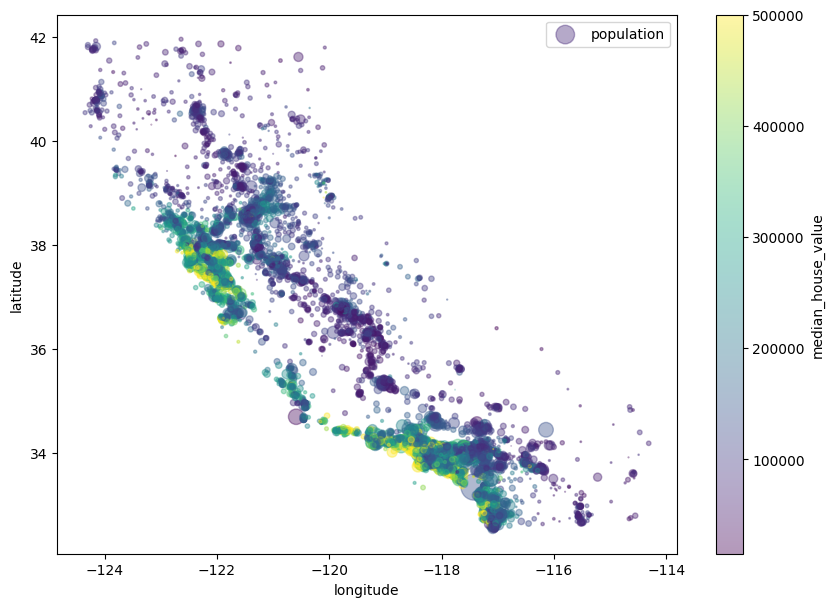

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/train/housing_train_processed.csv")

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"] / 100, label="population",
        c="median_house_value", cmap="viridis", colorbar=True, figsize=(10, 7))
plt.legend()


##  2. Feature Correlation Analysis

<Axes: >

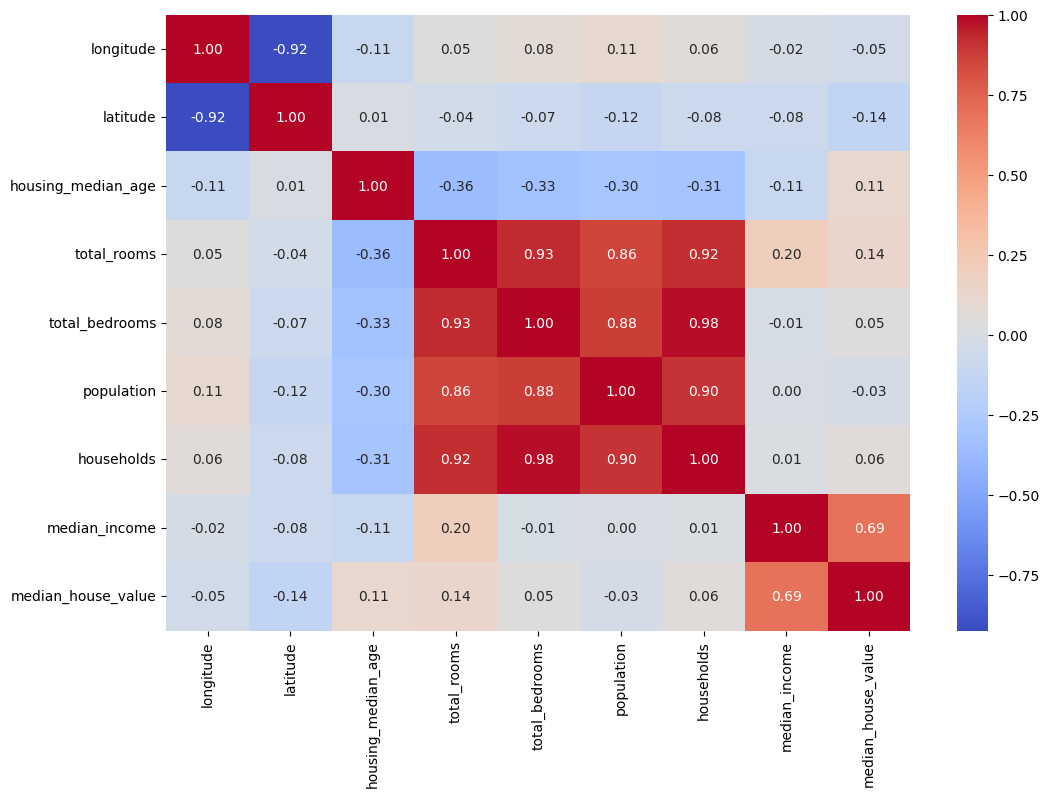

In [3]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending=False)


import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")


## 3. Feature Engineering

In [4]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

df = pd.get_dummies(df, columns=["ocean_proximity"])

final_features = df.drop("median_house_value", axis=1)
target = df["median_house_value"]

final_df = pd.concat([final_features, target], axis=1)
final_df.shape[1]  # Should show 24 columns total


17

## 4. Save Engineered Dataset

In [5]:
final_df.to_csv("../data/train/train_engineered.csv", index=False)